Imports + Load Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# load dataset
diab = pd.read_csv("../dataset/diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Quick population overview

In [9]:
diab.shape

(768, 9)

In [10]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A

Draw a reproducible sample and compute stats

In [11]:
np.random.seed(16358093)

sample_25 = diab.sample(n=25, replace=False, random_state=123)

# Population stats
pop_mean_glu = diab["Glucose"].mean()
pop_max_glu  = diab["Glucose"].max()

# Sample stats
samp_mean_glu = sample_25["Glucose"].mean()
samp_max_glu  = sample_25["Glucose"].max()

pop_mean_glu, samp_mean_glu, pop_max_glu, samp_max_glu

(120.89453125, 130.36, 199, 197)

Bar charts comparing Mean & Max of Glucose

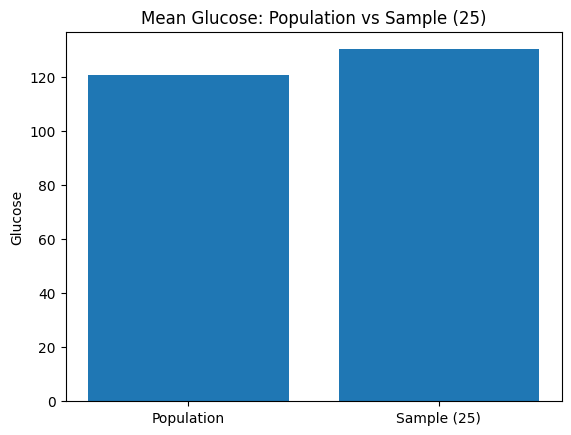

In [13]:
plt.figure()
plt.bar(["Population", "Sample (25)"], [pop_mean_glu, samp_mean_glu])
plt.title("Mean Glucose: Population vs Sample (25)")
plt.ylabel("Glucose")
plt.savefig("../outputs/Question2/glucose_mean_comparison.png", dpi=150)
plt.show()

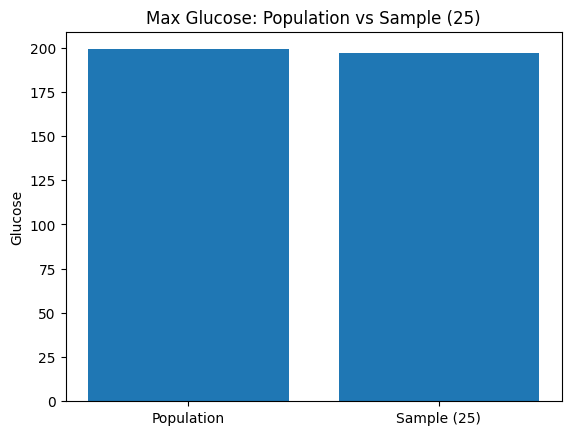

In [14]:
plt.figure()
plt.bar(["Population", "Sample (25)"], [pop_max_glu, samp_max_glu])
plt.title("Max Glucose: Population vs Sample (25)")
plt.ylabel("Glucose")
plt.savefig("../outputs/Question2/glucose_max_comparison.png", dpi=150)
plt.show()

B

Compute percentiles

In [15]:
pop_bmi_98  = np.percentile(diab["BMI"], 98)
samp_bmi_98 = np.percentile(sample_25["BMI"], 98)

pop_bmi_98, samp_bmi_98

(47.52599999999996, 45.263999999999996)

Bar chart comparing 98th percentile BMI

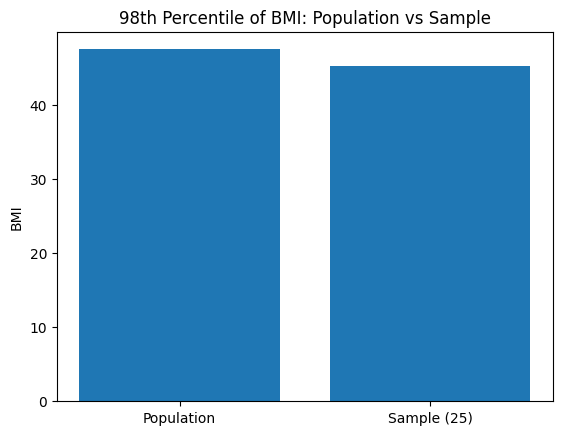

In [17]:
plt.figure()
plt.bar(["Population", "Sample (25)"], [pop_bmi_98, samp_bmi_98])
plt.title("98th Percentile of BMI: Population vs Sample")
plt.ylabel("BMI")
plt.savefig("../outputs/Question2/bmi_98_comparison.png", dpi=150)
plt.show()

C

Population stats for BloodPressure

In [18]:
pop_bp_mean = diab["BloodPressure"].mean()
pop_bp_std  = diab["BloodPressure"].std(ddof=1)
pop_bp_98   = np.percentile(diab["BloodPressure"], 98)

pop_bp_mean, pop_bp_std, pop_bp_98

(69.10546875, 19.355807170644777, 99.31999999999994)

Bootstrap loop

In [19]:
np.random.seed(123)

boot_means = []
boot_stds  = []
boot_p98   = []

for i in range(500):
    boot = diab.sample(n=150, replace=True)
    bp = boot["BloodPressure"]
    
    boot_means.append(bp.mean())
    boot_stds.append(bp.std(ddof=1))
    boot_p98.append(np.percentile(bp, 98))

boot_means = np.array(boot_means)
boot_stds  = np.array(boot_stds)
boot_p98   = np.array(boot_p98)

boot_means.mean(), boot_stds.mean(), boot_p98.mean()

(69.15222666666666, 19.192792750902836, 98.03292000000003)

Compare population vs bootstrap

In [20]:
compare_df = pd.DataFrame({
    "Statistic": ["Mean", "Std Dev", "98th Percentile"],
    "Population": [pop_bp_mean, pop_bp_std, pop_bp_98],
    "Bootstrap Avg": [boot_means.mean(), boot_stds.mean(), boot_p98.mean()]
})

compare_df

,Statistic,Population,Bootstrap Avg
0,Mean,69.105469,69.152227
1,Std Dev,19.355807,19.192793
2,98th Percentile,99.320000,98.032920


In [21]:
compare_df.to_csv("../outputs/Question2/bloodpressure_comparison.csv", index=False)

Visualization: Population vs Bootstrap

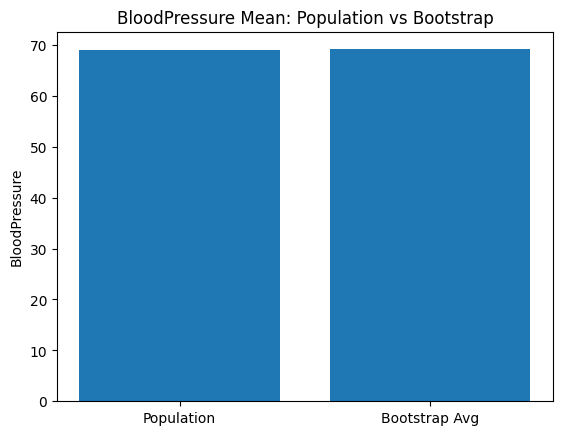

In [22]:
plt.figure()
plt.bar(["Population", "Bootstrap Avg"], [pop_bp_mean, boot_means.mean()])
plt.title("BloodPressure Mean: Population vs Bootstrap")
plt.ylabel("BloodPressure")
plt.savefig("../outputs/Question2/bp_mean_comparison.png", dpi=150)
plt.show()

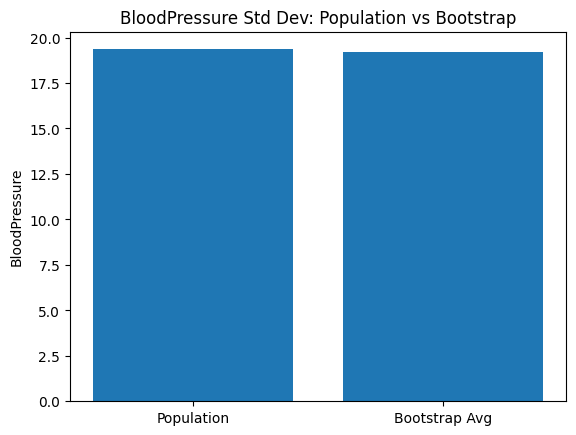

In [23]:
plt.figure()
plt.bar(["Population", "Bootstrap Avg"], [pop_bp_std, boot_stds.mean()])
plt.title("BloodPressure Std Dev: Population vs Bootstrap")
plt.ylabel("BloodPressure")
plt.savefig("../outputs/Question2/bp_std_comparison.png", dpi=150)
plt.show()

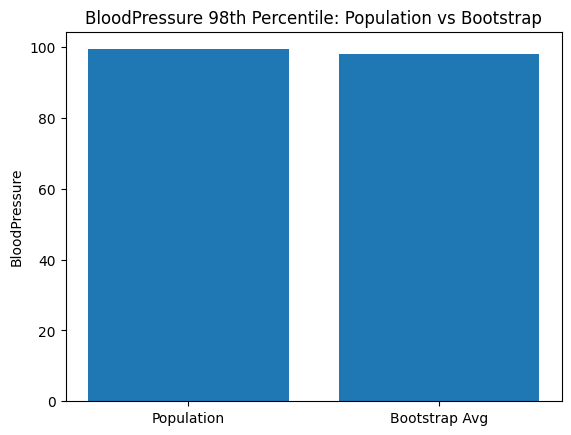

In [24]:
plt.figure()
plt.bar(["Population", "Bootstrap Avg"], [pop_bp_98, boot_p98.mean()])
plt.title("BloodPressure 98th Percentile: Population vs Bootstrap")
plt.ylabel("BloodPressure")
plt.savefig("../outputs/Question2/bp_98_comparison.png", dpi=150)
plt.show()

Bootstrap distribution histogram

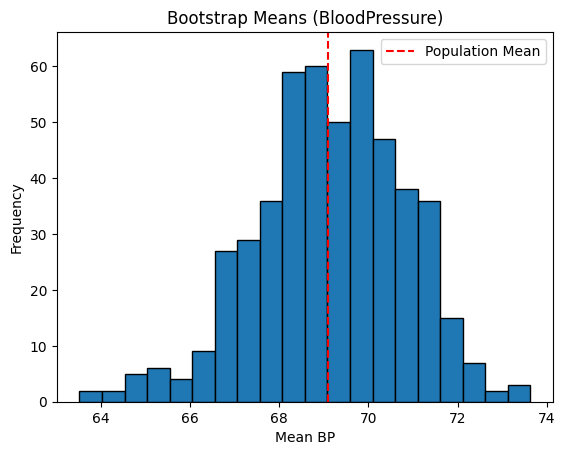

In [25]:
plt.figure()
plt.hist(boot_means, bins=20, edgecolor='black')
plt.axvline(pop_bp_mean, color='red', linestyle='dashed', label="Population Mean")
plt.title("Bootstrap Means (BloodPressure)")
plt.xlabel("Mean BP")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("../outputs/Question2/bp_bootstrap_mean_distribution.png", dpi=150)
plt.show()